In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1

For the Gaussian envelope $$f_X(t) = \exp\left(- \frac{t^2}{2\sigma^2}\right)$$
we obtain the expression:
$$a(p, \tau) = \int_{-\infty}^{\infty} dt \exp\left(-t^2\frac{1}{2\sigma^2} - \frac{1}{2}it^2\mathbf{p_i}\mathbf{F_{IR}}(\tau)\right) e^{i\Delta E(\mathbf{p_i})t}$$
with substitution
$$\gamma = \frac{1}{2\sigma^2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$
we get
$$a(p, \tau) = \int_{\infty}^{\infty} dt e^{-t^2 \gamma} e^{i\Delta E(\mathbf{p_i})t}$$

Then we can also consider $\Delta E(p_i)$ as a function of $p$:

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a(p, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \gamma} e^{i\alpha t} = \sqrt{\frac{\pi}{\gamma}} e^{-\alpha^2/(4\gamma)}$$

$$\gamma = \frac{1}{2\sigma^2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$




In [3]:
def a(p, tau):
    p_0_sq = 2*(omega_X - I_p) 
    alpha = 0.5*(p**2 + 2*p*A_ir(tau) + A_ir(tau)**2 - p_0_sq)
    gamma = 1/(2*sigma**2) + 0.5j*(p + A_ir(tau)) * F_IR(tau) # where (p + A_ir) is the brackets for p_i 
    return np.sqrt(np.pi/gamma)*np.exp(-alpha**2/(4*gamma))

with **FHWM** $= 2\sqrt{2\ln{2}} \sigma$

It looks lite it is an important point to convert times from fsec to atomic time units 

1 atomic time unit = 2.41e-17 sec = 2.41e-2 fsec

XUV pulse in time-domain:
$$ \mathbf{F}_{XUV}(t) = \mathbf{F}_X f_X(t)e^{-i\Omega_Xt} $$

## Subtask 1
Choose the carrier frequency and the duration of the transform-limited attosecond pulse.

For the transform-limited pulse the envelope $f_X(t − \tau )$ is purely real.

Choose your envelope to be Gaussian, to make the analytical calculations easy.

In the analytical calculations, you can (and should) keep the parameters flexible.

For the plots you can try $300$ asec full width at half maximum (FWHM), with the carrier around $68 $ eV – this corresponds to $2.5$ atomic units, which is convenient if the ionization potential of your atom is $I_p = 1/2$ a.u.

In [4]:
# time in fsec -> atomic time units

sigma = 0.3/(2*np.sqrt(2*np.log(2))) / 2.41e-2
print(f"attosec pulse sigma: {sigma}")
omega_X = 2.5
I_p = 0.5

attosec pulse sigma: 5.286235271502194


## Subtask 2
Choose the carrier frequency and the duration of the transform-limited IR probe pulse.

This should be relatively long pulse to make your analytical calculations easy, so that you can ignore the change of the IR envelope during the XUV pulse.

Again, you should keep it general for the analytical calculations.

For the plots an option would be to use a Gaussian with FWHM= $6$ fsec, with the carrier frequency $\omega = 1/20 $ a.u. $\approx 1.36$ eV.

$$\mathbf{F_{IR}}(\tau) = \mathbf{F_{IR}}\cdot f_{IR}(\tau)\sin(\Omega_{IR} \tau) % e^{-i\Omega_{IR}\tau}$$ 

In [5]:
# calc sigma from fwhm and convert to atomic units time
sigma_IR = 6./(2*np.sqrt(2*np.log(2))) / 2.41e-2
print(f"FWHM 6 fs: {6 / 2.41e-2}")
print(f"IR pulse sigma: {sigma_IR}")

omega_IR = 0.05 # 1./20.

FWHM 6 fs: 248.96265560165975
IR pulse sigma: 105.72470543004387


In [153]:
# envelope for gauss pulse
def f_ir(tau):
    return np.exp(-tau**2/(2*sigma_IR**2))

264.7249065612467

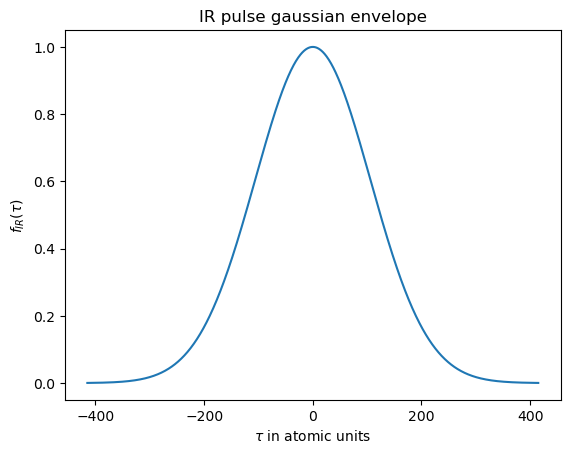

In [154]:
plt.figure()
tau = np.linspace(-10/ 2.41e-2, 10/ 2.41e-2, 1000)
plt.plot(tau, np.real(f_ir(tau)))
plt.title("IR pulse gaussian envelope")
plt.xlabel(r"$\tau$ in atomic units")
plt.ylabel(r"$f_{IR}(\tau)$")

# check if norm is correct and the envelope area is approx 1.
np.sum(f_ir(tau)*20/ 2.41e-2/1000)

## Subtask 3
Choose the field strength of your IR probe.

For the analytical calculations, you should keep it general.

For the plots, you should try various values, but keep it relatively low, with the intensity level around $1012$ W /cm2, which would correspond to $F_{IR} \approx$ 1/200 a.u.

In [155]:
F_const_IR = 1./200.
# F_const_IR = 1./50.
def F_IR(tau):
    # electric field ~ e^{i\omega\tau}
    #return F_const_IR*f_ir(tau)*np.exp(-1j*omega_IR*tau)
    # only cos
    return F_const_IR*f_ir(tau)*np.cos(omega_IR*tau)

check consistency with XUV pulse

In [156]:
def F_XUV(t):
    F_const_XUV = 1./500
    f_x = np.exp(-t**2/(2*sigma**2))/ (sigma*np.sqrt(2*np.pi))
    return F_const_XUV*f_x*np.exp(-1j*omega_X*t)

Text(0, 0.5, '$\\Re(\\mathbf{F_{IR}})$')

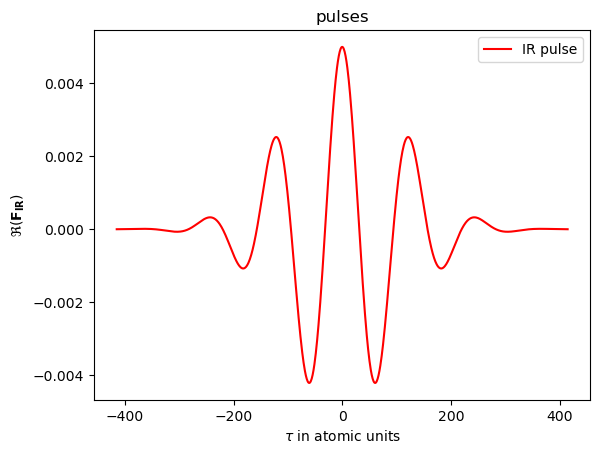

In [157]:
plt.figure()
tau = np.linspace(-10/ 2.41e-2, 10/ 2.41e-2, 1000)
plt.plot(tau, np.real(F_IR(tau)), label="IR pulse", color='red')
plt.title("pulses")
plt.legend()
plt.xlabel(r"$\tau$ in atomic units")
plt.ylabel(r"$\Re(\mathbf{F_{IR}})$")

Text(0, 0.5, '$\\Re(\\mathbf{F_{XUV}})$')

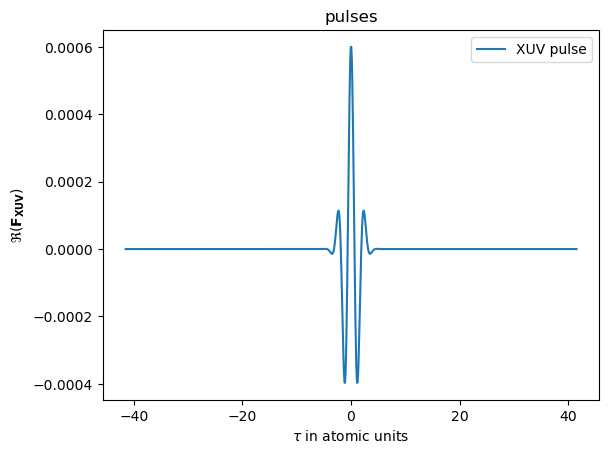

In [158]:
plt.figure()
tau = np.linspace(-1 / 2.41e-2, 1/ 2.41e-2, 1000)
plt.plot(tau, np.real(F_XUV(tau)), label="XUV pulse")
plt.title("pulses")
plt.legend()
plt.xlabel(r"$\tau$ in atomic units")
plt.ylabel(r"$\Re(\mathbf{F_{XUV}})$")

## Subtask 4
Choose the CEP of your IR pulse.

Again, you can and you should try different CEP values for the plots, but for the analytical calculations you should keep it general.

Start with a cosine pulse for the field, hence sinusoidal pulse for the vector potential.

with electric field:
$$ E_x \propto e^{i\omega\tau}$$
and 
$$ E_x = \mathbf{E} = - \frac{\partial \mathbf{A}}{\partial t} \Rightarrow \mathbf{A} = -i \cdot \frac{e^{i\omega\tau}}{\omega}$$

In [159]:
def A_ir(tau):
    # only sin
    return - F_const_IR* f_ir(tau)* np.sin(omega_IR*tau) / omega_IR

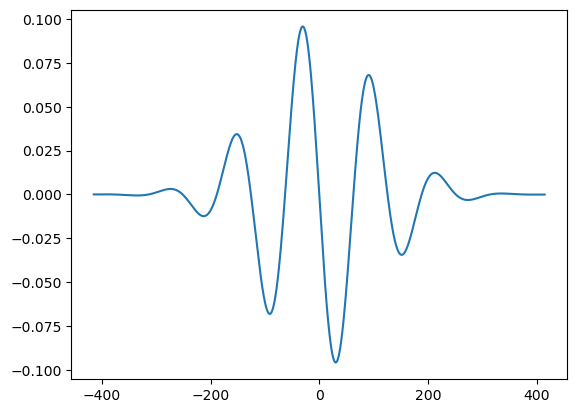

In [160]:
plt.figure()
tau = np.linspace(-10/ 2.41e-2, 10/ 2.41e-2, 1000)
plt.plot(tau, np.real(A_ir(tau)))

## Subtask 5
Calculate the spectrogram analytically as a function
of the XUV-IR time-delay, using the expression
given above.

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a(p, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \gamma} e^{i\alpha t} = \sqrt{\frac{\pi}{\gamma}} e^{-\alpha^2/(4\gamma)}$$

$$\gamma = \frac{1}{2\sigma^2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$

In [161]:
def a(p, tau):
    p_0_sq = 2*(omega_X - I_p)
    # reduce alpha to the linear term
    # alpha = 0.5*(p**2 + 2*p*A_ir(tau) + A_ir(tau)**2 - p_0_sq)
    alpha = 0.5*(p**2 + 2*p*A_ir(tau) - p_0_sq)
    gamma = 1/(2*sigma**2) + 0.5j*(p + A_ir(tau)) * F_IR(tau) # where (p + A_ir) is the brackets for p_i 
    return np.sqrt(np.pi/gamma) * np.exp(-alpha**2/(4*gamma))

In [162]:
def alpha(p, tau):
    p_0_sq = 2*(omega_X - I_p)
    return 0.5*(p**2 + 2*p*A_ir(tau) - p_0_sq)

In [164]:
# calculating sigma for gaussian with fwhm of 300 attosec
sigma = 0.3 / (2*np.sqrt(2*np.log(2))) / 2.41e-2

# -1.5 fsec -> +1.5 fsec
tau = np.linspace(-7.5/ 2.41e-2, 7.5/ 2.41e-2, 1000)

# creating p_i as span from 1 to 3 a.u 
p_f = np.linspace(1, 3, 1000)

# create a grid of p_i and tau
pp_f, tautau = np.meshgrid(p_f, tau)

# applying tau dependent component to the grid of p_i making it a grid of p_f

# calculate the spectrogram for the grid of p_f and tau
spectrogram1 = a(pp_f, tautau)

# calculating sigma for gaussian with fwhm of 
# 150 attosec
sigma = 0.15/(2*np.sqrt(2*np.log(2))) / 2.41e-2
spectrogram2 = a(pp_f, tautau)

# calculating sigma for gaussian with fwhm of 
# 75 attosec
sigma = 0.075/(2*np.sqrt(2*np.log(2))) / 2.41e-2
spectrogram3 = a(pp_f, tautau)


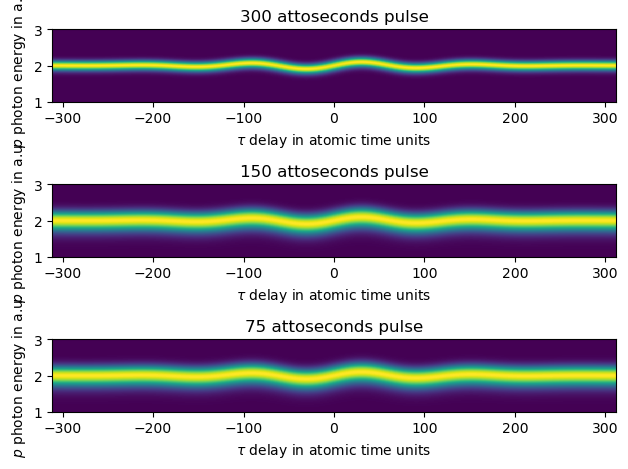

In [165]:
plt.subplot(311)
plt.title("300 attoseconds pulse")
plt.pcolormesh(tau, p_f, np.abs(spectrogram1).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")

plt.subplot(312)
plt.title("150 attoseconds pulse")
plt.pcolormesh(tau, p_f, np.abs(spectrogram2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")

plt.subplot(313)
plt.title("75 attoseconds pulse")
plt.pcolormesh(tau, p_f, np.abs(spectrogram2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")

plt.tight_layout()

## Subtask 6
Plot the results of your calculations. See how you
can extract the duration of the XUV pulse and the
parameters of the IR field from the spectrograms.
Do not ignore the availability of analytical results.

## Subtask 7
Check if you can drop the terms quadratic in the
IR field strength from the expressions. What would
be the conditions under which this is possible?

# Task 2

For the Gaussian envelope $$f_X(t) = \exp\left(- \frac{t^2}{2\sigma^2}\right)\cdot \exp\left(-\frac{1}{2}i\kappa t^2\right) = \exp\left(-t^2 \left[\frac{1}{2\sigma^2} + i\frac{1}{2}\kappa \right]\right) $$
we obtain the expression:

$$a(p, \tau) = \int_{-\infty}^{\infty} dt \exp\left(-t^2\left[\frac{1}{2\sigma^2} + i\frac{1}{2}\kappa\right] - \frac{1}{2}it^2\mathbf{p_i}\mathbf{F_{IR}}(\tau)\right) e^{i\Delta E(\mathbf{p_i})t}$$
with substitution

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$
we get

$$a(p, \tau) = \int_{\infty}^{\infty} dt e^{-t^2 \mu} e^{i\Delta E(\mathbf{p_i})t}$$

Then we can also consider $\Delta E(p_i)$ as a function of $p$:

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a_2(p, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \mu} e^{i\alpha t} = \sqrt{\frac{\pi}{\mu}} e^{-\alpha^2/(4\mu)}$$

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$


In [221]:
def a_2(p, tau):
    p_0_sq = 2*(omega_X - I_p)
    # reduce alpha to the linear term
    # alpha = 0.5*(p**2 + 2*p*A_ir(tau) + A_ir(tau)**2 - p_0_sq)
    alpha = 0.5*(p**2 + 2*p*A_ir(tau) - p_0_sq)
    mu = 1/(2*sigma**2) + 0.5j*(p + A_ir(tau)) * F_IR(tau) + 1j*kappa/2 # where (p + A_ir) is the brackets for p_i 
    return np.sqrt(np.pi/mu) * np.exp(-alpha**2/(4*mu))

In [227]:
# calculating sigma for gaussian with fwhm of 300 attosec
kappa = 1e-3
sigma = 0.3 / (2*np.sqrt(2*np.log(2))) / 2.41e-2

# -1.5 fsec -> +1.5 fsec
tau = np.linspace(-7.5/ 2.41e-2, 7.5/ 2.41e-2, 1000)

# creating p_i as span from 1 to 3 a.u 
p_f = np.linspace(1, 3, 1000)

# create a grid of p_i and tau
pp_f, tautau = np.meshgrid(p_f, tau)

# applying tau dependent component to the grid of p_i making it a grid of p_f

# calculate the spectrogram for the grid of p_f and tau
spectrogram_2 = a_2(pp_f, tautau)

5.286235271502194 0.01


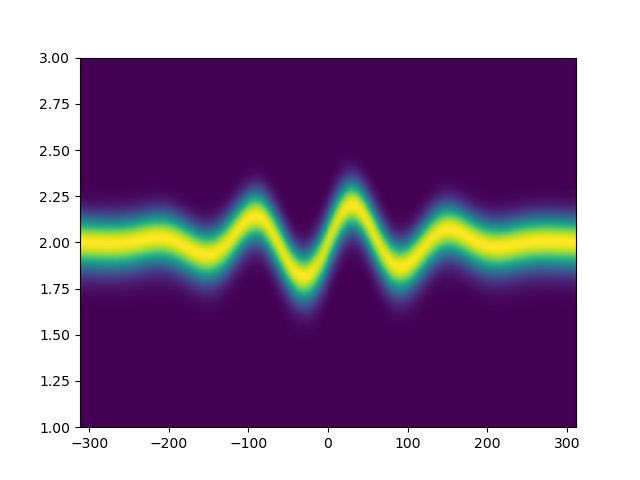

In [231]:
%matplotlib widget
plt.figure()
F_const_IR = 1./100
print(sigma, F_const_IR)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )


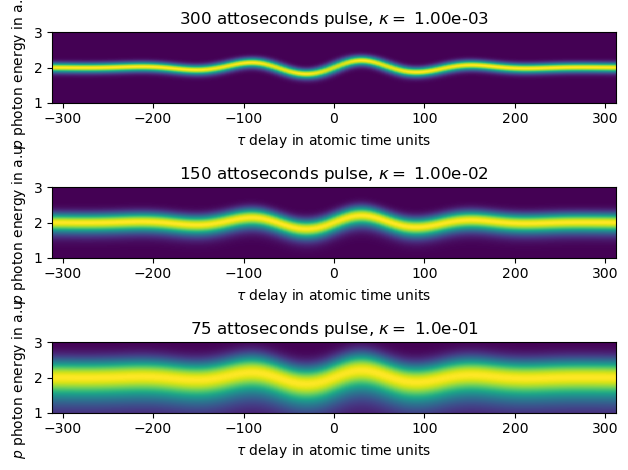

In [223]:
plt.subplot(311)
kappa = 1e-3
plt.title(r"300 attoseconds pulse, $\kappa =$ %.2e"% kappa)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")

plt.subplot(312)
kappa = 1e-2
sigma = 0.150 / (2*np.sqrt(2*np.log(2))) / 2.41e-2
plt.title(r"150 attoseconds pulse, $\kappa =$ %.2e"% kappa)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")


plt.subplot(313)
kappa = 1e-1
sigma = 0.075 / (2*np.sqrt(2*np.log(2))) / 2.41e-2
plt.title(r"75 attoseconds pulse, $\kappa =$ %1.1e" % kappa)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")
plt.tight_layout()


ValueError: operands could not be broadcast together with shapes (1000,1000) (300,500) 

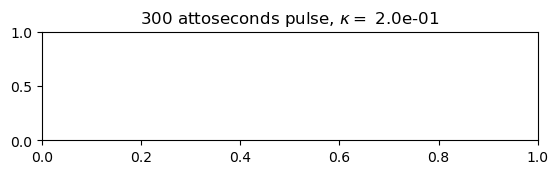

In [220]:
plt.subplot(311)
kappa = 2e-1
sigma = 0.3 / (2*np.sqrt(2*np.log(2))) / 2.41e-2
plt.title(r"300 attoseconds pulse, $\kappa =$ %1.1e" % kappa)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")

plt.subplot(312)
kappa = 3e-1
sigma = 0.150 / (2*np.sqrt(2*np.log(2))) / 2.41e-2
plt.title(r"150 attoseconds pulse, $\kappa =$ %1.1e" % kappa)
spectrogram_2 = a_2(pp_f, tautau)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")


plt.subplot(313)
sigma = 0.7 / (2*np.sqrt(2*np.log(2))) / 2.41e-2
kappa = 6e-1
plt.title(r"700 attoseconds pulse, $\kappa =$ %1.1e" % kappa)
plt.pcolormesh(tau, p_f, np.abs(spectrogram_2).T, )
plt.xlabel(r"$\tau$ delay in atomic time units")
plt.ylabel(r"$p$ photon energy in a.u.")
plt.tight_layout()


## Tuning IR field amplitude

In [187]:
from matplotlib.animation import FuncAnimation

In [214]:
fig = plt.figure()
sigma = 0.3 / (2*np.sqrt(2*np.log(2))) / 2.41e-2

# -1.5 fsec -> +1.5 fsec
tau_steps = 300
tau = np.linspace(-7.5/ 2.41e-2, 7.5/ 2.41e-2, tau_steps)

# creating p_i as span from 1 to 3 a.u
p_steps = 500
p_f = np.linspace(1, 3, p_steps)

pp, tautau = np.meshgrid(p_f, tau)

kappa = 0.1
steps = 500
frames_01 = np.zeros((steps, p_steps, tau_steps), dtype=np.float64)
for m in range(steps):
    global F_const_IR
    F_const_IR = m/steps*1./100
    frames_01[m] = np.abs(a_2(pp, tautau)).T

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
title = plt.title(f"FWHM 300 as, kappa = {kappa:.1f}, 0% intensity")
plot = plt.pcolormesh(tau, p_f, frames[0])

#plot.set_array(np.abs(spectrogram).T)

def update(index):
    plot.set_array(frames[index])
    title.set_text(f"FWHM 300 as, kappa = {kappa:.1f}, {index/steps*100:.2f}% intensity")
    return

ani = FuncAnimation(fig, update, frames=range(steps))
ani.save("vary_intensity_IR_150dpi.mp4", fps=35, dpi=150)


In [215]:
fig = plt.figure()
sigma = 0.3 / (2*np.sqrt(2*np.log(2))) / 2.41e-2

# -1.5 fsec -> +1.5 fsec
tau_steps = 300
tau = np.linspace(-7.5/ 2.41e-2, 7.5/ 2.41e-2, tau_steps)

# creating p_i as span from 1 to 3 a.u
p_steps = 500
p_f = np.linspace(1, 3, p_steps)

pp, tautau = np.meshgrid(p_f, tau)


kappa = 0.05
steps = 500
frames_005 = np.zeros((steps, p_steps, tau_steps), dtype=np.float64)
for m in range(steps):
    global F_const_IR
    F_const_IR = m/steps*1./100
    frames_005[m] = np.abs(a_2(pp, tautau)).T

<Figure size 640x480 with 0 Axes>

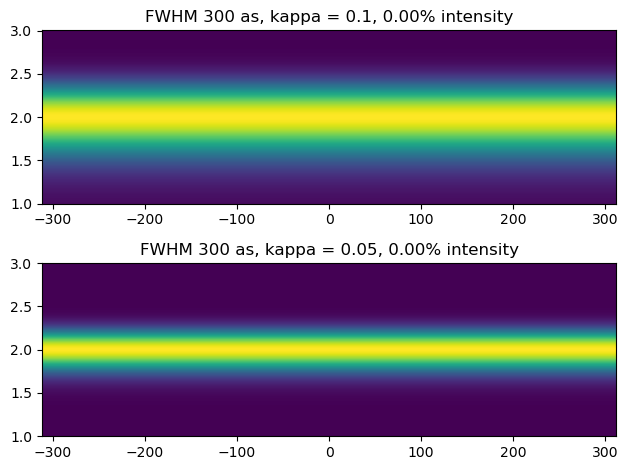

In [219]:
fig, axs = plt.subplots(2, 1)
axs[0].set_title(f"FWHM 300 as, kappa = 0.1, 0% intensity")
axs[1].set_title(f"FWHM 300 as, kappa = 0.05, 0% intensity")

plot1 = axs[0].pcolormesh(tau, p_f, frames_01[0])
plot2 = axs[1].pcolormesh(tau, p_f, frames_005[0])
fig.tight_layout()
#plot.set_array(np.abs(spectrogram).T)

def update(index):
    plot1.set_array(frames_01[index])
    plot2.set_array(frames_005[index])
    axs[0].set_title(f"FWHM 300 as, kappa = 0.1, {index/steps*100:.2f}% intensity")
    axs[1].set_title(f"FWHM 300 as, kappa = 0.05, {index/steps*100:.2f}% intensity")
    return

ani = FuncAnimation(fig, update, frames=range(steps))
ani.save("vary_intensity_IR_150dpi_both.mp4", fps=35, dpi=150)
